In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('sonar_dataset.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


### EDA

In [11]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [27]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [20]:
df.shape

(208, 61)

<AxesSubplot:>

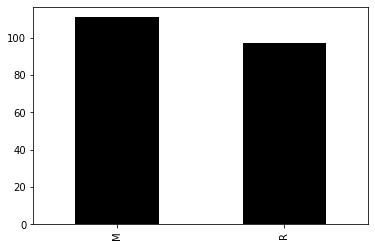

In [44]:
df[df.columns[-1]].value_counts().plot(kind='bar',color='black')

### Preparation

In [49]:
X = df.drop(columns=60)
y = df[df.columns[-1]]

In [56]:
y_encoded = pd.get_dummies(y , drop_first=True)
y_encoded.sample(5)

,R
98,0
7,1
40,1
3,1
195,0


In [58]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X, y_encoded , test_size=0.25 , random_state=1)

In [62]:
y_test[:5]

,R
186,0
155,0
165,0
200,0
58,1


### Model

In [65]:
X.shape

(208, 60)

In [113]:
model = keras.Sequential([
    keras.layers.Dense(60,input_shape=(60,) , activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

model.fit(x_train , y_train , epochs=100 , batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.6958 - accuracy: 0.5641
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.7115
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6587 - accuracy: 0.7051
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6347 - accuracy: 0.7115
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.6923
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5723 - accuracy: 0.7115
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5257 - accuracy: 0.7628
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5139 - accuracy: 0.7628
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4729 - accuracy: 0.8013
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4249 - accuracy: 0.8718
Epoch 11/

20/20 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 84/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 85/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 86/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 87/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 88/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 89/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 90/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 91/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 92/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 93/100


#### Evaluate

In [114]:
model.evaluate(x_train , y_train)

5/5 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000


[0.0026757847517728806, 1.0]

In [115]:
model.evaluate(x_test , y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.7670 - accuracy: 0.7500


[0.7670207619667053, 0.75]

In [116]:
model.predict(x_test)
y_pred = model.predict(x_test).reshape(-1)
y_pred

2/2 [==============================] - 0s 8ms/step


array([7.9732035e-07, 9.9776369e-01, 9.7564918e-01, 1.3534966e-04,
       1.0000000e+00, 9.9996209e-01, 3.2465819e-01, 1.0000000e+00,
       8.4479376e-05, 1.0000000e+00, 6.8069577e-02, 1.8940605e-02,
       1.2440176e-03, 8.6969632e-04, 4.9242157e-02, 7.5084686e-01,
       9.9999946e-01, 3.1691635e-04, 9.1067517e-01, 9.9999982e-01,
       7.1222392e-05, 1.0000000e+00, 1.3959523e-01, 9.9999905e-01,
       9.9097565e-04, 1.4796373e-05, 3.4424019e-01, 4.2190254e-04,
       1.0000000e+00, 9.8515430e-04, 8.1650847e-01, 8.7022245e-06,
       7.8992087e-01, 4.7157399e-02, 9.9938077e-01, 9.9828976e-01,
       1.0000000e+00, 4.0887693e-01, 9.9999940e-01, 9.2258578e-04,
       7.5620068e-03, 1.4210701e-03, 3.1673558e-02, 7.3549665e-05,
       7.7107499e-05, 5.3156191e-04, 2.7716625e-01, 1.0000000e+00,
       1.8540052e-03, 1.6594432e-02, 2.8433453e-02, 2.4927742e-04],
      dtype=float32)

#### Compare

In [95]:
np.round(y_pred[:5])

array([0., 1., 1., 0., 1.], dtype=float32)

In [96]:
y_test[:5].T

,186,155,165,200,58
R,0,0,0,0,1


#### Metrics

In [102]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test , np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77        27
           1       0.79      0.60      0.68        25

    accuracy                           0.73        52
   macro avg       0.74      0.73      0.72        52
weighted avg       0.74      0.73      0.73        52



<AxesSubplot:>

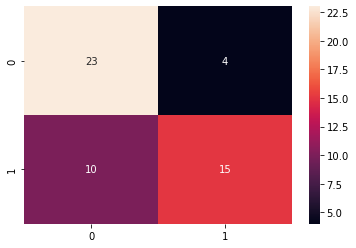

In [110]:
sn.heatmap(confusion_matrix(y_test , np.round(y_pred)) , annot=True)

### Dropout Regularization

In [112]:
model_d = keras.Sequential([
    keras.layers.Dense(60,input_shape=(60,) , activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])

model_d.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

model_d.fit(x_train , y_train , epochs=100 , batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.7636 - accuracy: 0.5064
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7162 - accuracy: 0.5256
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7099 - accuracy: 0.5192
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7159 - accuracy: 0.4936
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7144 - accuracy: 0.4615
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.7014 - accuracy: 0.4872
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6975 - accuracy: 0.4936
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7199 - accuracy: 0.4487
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.4744
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6870 - accuracy: 0.5641
Epoch 11/

20/20 [==============================] - 0s 4ms/step - loss: 0.3636 - accuracy: 0.8333
Epoch 84/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.8590
Epoch 85/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3623 - accuracy: 0.8590
Epoch 86/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3083 - accuracy: 0.8654
Epoch 87/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.8141
Epoch 88/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3716 - accuracy: 0.8654
Epoch 89/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3119 - accuracy: 0.8590
Epoch 90/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3155 - accuracy: 0.8462
Epoch 91/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3245 - accuracy: 0.8782
Epoch 92/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3255 - accuracy: 0.8846
Epoch 93/100


#### Evaluate

In [118]:
model_d.evaluate(x_train , y_train)  ,  model.evaluate(x_train , y_train)

5/5 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000


([0.1817200779914856, 0.9487179517745972], [0.0026757847517728806, 1.0])

In [119]:
model_d.evaluate(x_test , y_test)  ,  model.evaluate(x_test , y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.7670 - accuracy: 0.7500


([0.4802551865577698, 0.7884615659713745], [0.7670207619667053, 0.75])

#### Compare

In [131]:
model_d.predict(x_test)
y_pred_d = model_d.predict(x_test).reshape(-1)

2/2 [==============================] - 0s 7ms/step


In [132]:
np.round(y_pred_d[:5])

array([0., 1., 1., 0., 1.], dtype=float32)

In [133]:
y_test[:5].T

,186,155,165,200,58
R,0,0,0,0,1


#### Metrics

In [135]:
print(classification_report(y_test , np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        27
           1       0.80      0.64      0.71        25

    accuracy                           0.75        52
   macro avg       0.76      0.75      0.75        52
weighted avg       0.76      0.75      0.75        52



In [138]:
print(classification_report(y_test , np.round(y_pred_d)))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.82      0.72      0.77        25

    accuracy                           0.79        52
   macro avg       0.79      0.79      0.79        52
weighted avg       0.79      0.79      0.79        52



<AxesSubplot:>

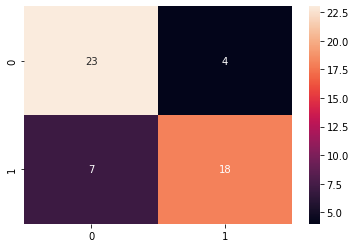

In [137]:
sn.heatmap(confusion_matrix(y_test , np.round(y_pred_d)) , annot=True)

<AxesSubplot:>

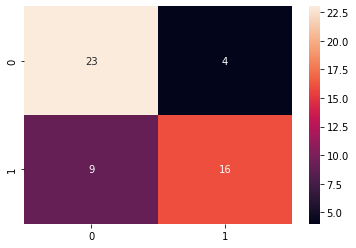

In [136]:
sn.heatmap(confusion_matrix(y_test , np.round(y_pred)) , annot=True)